# Plots for Training and Validation

In [1]:
import sys

SOFTWARE_DIR = '/sdf/data/neutrino/software/spine/src/' # Change this path to your software install
DATA_DIR = '/sdf/home/j/jessicam/Mx2/data/larcv/' # Change this path if you are not on SDF (see main README)

# Set software directory
sys.path.append(SOFTWARE_DIR)

## Looking at training progress

## Import Training log

In [2]:
import pandas as pd

path = '/n/holystore01/LABS/iaifi_lab/Users/jmicallef/logs/grappa/train_log-0000000.csv' # Adapt path name
df = pd.read_csv(path)
#Find how many iterations per epoch, which depends on the batch size and data
iterations_per_epoch = np.where(df.epoch==1.0)[0] 
df

,iter,epoch,first_entry,cpu_mem,cpu_mem_perc,gpu_mem,gpu_mem_perc,iteration_time,iteration_time_cpu,iteration_time_sum,...,model_backward_time_sum_cpu,model_save_time,model_save_time_cpu,model_save_time_sum,model_save_time_sum_cpu,edge_accuracy,edge_loss,edge_count,loss,accuracy
0,0,0.002268,7877,21.076996,2.6,0.018738,0.022051,14.137878,13.942940,14.137878,...,0.038464,0.000006,0.000006,0.000006,0.000006,0.340860,0.814629,930,0.814629,0.340860
1,1,0.004535,13605,21.077365,2.6,0.018738,0.022051,0.231464,0.187155,14.369342,...,0.046243,0.000006,0.000006,0.000012,0.000012,0.361570,0.766734,484,0.766734,0.361570
2,2,0.006803,9381,21.077529,2.6,0.018738,0.022051,0.139584,0.138332,14.508926,...,0.053929,0.000005,0.000005,0.000017,0.000017,0.414747,0.731362,434,0.731362,0.414747
3,3,0.009070,997,21.077303,2.6,0.018738,0.022051,0.172460,0.170241,14.681386,...,0.062104,0.000005,0.000005,0.000023,0.000022,0.446128,0.710662,594,0.710662,0.446128
4,4,0.011338,11493,21.078139,2.6,0.018738,0.022051,0.168990,0.167607,14.850375,...,0.070220,0.000005,0.000005,0.000028,0.000027,0.509740,0.687669,616,0.687669,0.509740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,1759,3.990930,11320,21.022114,2.6,0.022072,0.025975,0.140981,0.140102,300.022043,...,14.157570,0.000005,0.000005,0.396518,0.376707,0.987552,0.048543,482,0.048543,0.987552
1760,1760,3.993197,10104,21.022015,2.6,0.022072,0.025975,0.172932,0.171772,300.194974,...,14.165724,0.000005,0.000005,0.396523,0.376712,0.985484,0.026075,620,0.026075,0.985484
1761,1761,3.995465,11384,21.022081,2.6,0.022072,0.025975,0.173679,0.172491,300.368654,...,14.173920,0.000005,0.000005,0.396528,0.376718,0.995327,0.013984,642,0.013984,0.995327
1762,1762,3.997732,3320,21.021848,2.6,0.022072,0.025975,0.159607,0.158688,300.528261,...,14.182076,0.000005,0.000005,0.396533,0.376723,0.981949,0.036592,554,0.036592,0.981949


Let's take look at the keys, specifically:

<AxesSubplot: xlabel='iter'>

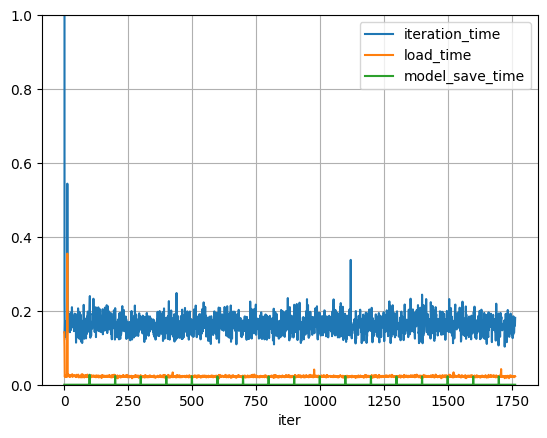

In [3]:
df.plot('iter', ['iteration_time', 'load_time', 'model_save_time'], ylim=[0,1.0], grid=True) #seconds

<AxesSubplot: xlabel='iter'>

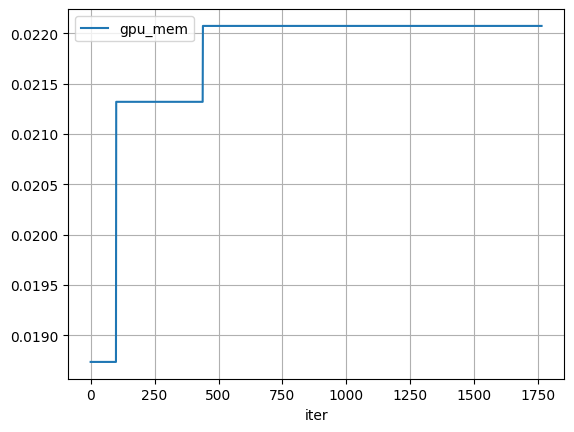

In [4]:
df.plot('iter', 'gpu_mem', grid=True)

# Validation -- Need to run inference before this step

## To run validation, use `loop_validation.sh`. I suggest running this in a terminal, not in jupyter notebooks

## Once you have the log files from each validation

In [5]:
import glob

val_files = glob.glob('logs/grappa/inference*')
print(val_files)

['logs/grappa/inference_log-0001200.csv', 'logs/grappa/inference_log-0000500.csv', 'logs/grappa/inference_log-0001300.csv', 'logs/grappa/inference_log-0000300.csv', 'logs/grappa/inference_log-0001500.csv', 'logs/grappa/inference_log-0001000.csv', 'logs/grappa/inference_log-0001700.csv', 'logs/grappa/inference_log-0000800.csv', 'logs/grappa/inference_log-0001100.csv', 'logs/grappa/inference_log-0000700.csv', 'logs/grappa/inference_log-0000600.csv', 'logs/grappa/inference_log-0000200.csv', 'logs/grappa/inference_log-0000400.csv', 'logs/grappa/inference_log-0000100.csv', 'logs/grappa/inference_log-0001600.csv', 'logs/grappa/inference_log-0000900.csv', 'logs/grappa/inference_log-0001400.csv']


In [6]:
iterations = [int(f.split('-')[-1][:7]) for f in val_files]
epochs = [float(i/iterations_per_epoch) for i in iterations]
losses = [pd.read_csv(f).loss.mean() for f in val_files]
stds = [pd.read_csv(f).loss.std() for f in val_files]
accuracys = [pd.read_csv(f).accuracy.mean() for f in val_files]
astds = [pd.read_csv(f).accuracy.std() for f in val_files]
print(iterations, epochs)
print(losses)

[1200, 500, 1300, 300, 1500, 1000, 1700, 800, 1100, 700, 600, 200, 400, 100, 1600, 900, 1400] [2.722631877481566, 1.1344299489506524, 2.9495178672716964, 0.6806579693703915, 3.403289846851957, 2.268859897901305, 3.857061826432218, 1.8150879183210438, 2.4957458876914353, 1.5882019285309132, 1.361315938740783, 0.45377197958026094, 0.9075439591605219, 0.22688598979013047, 3.6301758366420875, 2.0419739081111743, 3.1764038570618265]
[0.022773077187104848, 0.03000592663414584, 0.01836426241691181, 0.03565824400445739, 0.018534293205539863, 0.01858018344060803, 0.014940567717186971, 0.0205490176982692, 0.0180804445613723, 0.02474231104084732, 0.02575304287978827, 0.04853382019498264, 0.030809534697973383, 0.10567077424596334, 0.015644809676768574, 0.021911171153422494, 0.01682621787180884]


In [7]:
import numpy as np
print(min(losses), max(accuracys),np.argmin(losses),np.argmax(accuracys),epochs[np.argmax(accuracys)])

0.014940567717186971 0.9951174158733143 6 6 3.857061826432218


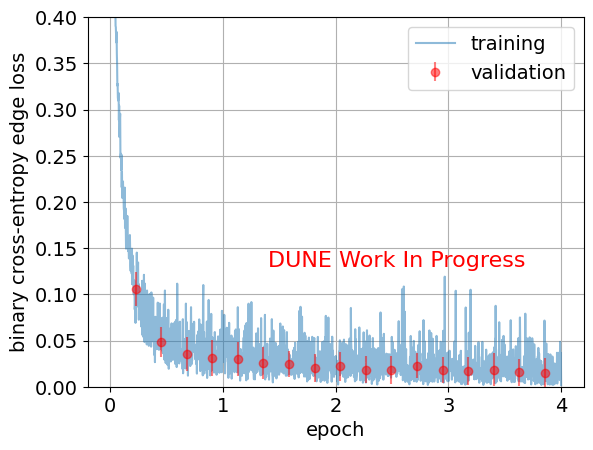

In [8]:
from matplotlib import pyplot as plt

df.plot('epoch', 'loss', ylim=[0,0.4], grid=True,label="training",alpha=0.5)
plt.errorbar(epochs, losses, yerr=stds, fmt='o', color="red",alpha=0.5, label='validation')
plt.legend(fontsize=14)
plt.ylabel("binary cross-entropy edge loss",fontsize=14)
plt.xlabel("epoch",fontsize=14)
plt.text(1.4, .13, 'DUNE Work In Progress', fontsize=16, color='red')
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.savefig("plots/loss_"+str(max(epochs))+".png",dpi=300,bbox_inches="tight")

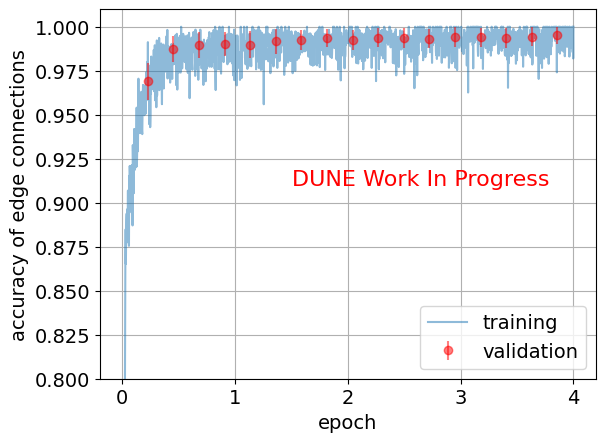

In [9]:
df.plot('epoch', 'accuracy', ylim=[0.8,1.01], grid=True,label="training",alpha=0.5)
plt.errorbar(epochs, accuracys, yerr=astds, fmt='o', color="red",alpha=0.5, label='validation')
plt.legend(fontsize=14)
plt.ylabel("accuracy of edge connections",fontsize=14)
plt.xlabel("epoch",fontsize=14)
plt.text(1.5, .91, 'DUNE Work In Progress', fontsize=16, color='red')
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.savefig("plots/accuracy_"+str(max(epochs))+".png",dpi=300,bbox_inches="tight")

# Make Validation HDF5 Sample with the BEST (or chosen best) iteration

## Edit the configuration file to point to the weights from the chosen validation iteration from above. This will output the event information using the weights from that GNN. ONLY NEED TO RUN THIS ONCE--DON'T NEED TO REMAKE THE FILE EVERY TIME

In [2]:
import yaml
from spine.driver import Driver

# Load configuration file of the ML chain
cfg_path = '/n/holystore01/LABS/iaifi_lab/Users/jmicallef/configs/validation_grappa_writer.cfg'
cfg = yaml.load(open(cfg_path, 'r'), Loader=yaml.Loader)

driver = Driver(cfg)

Welcome to JupyROOT 6.22/08

 ██████████   ██████████    ███   ███       ██   ███████████
███        █  ██       ███   █    █████     ██   ██         
  ████████    ██       ███  ███   ██  ████  ██   ██████████ 
█        ███  ██████████     █    ██     █████   ██         
 ██████████   ██            ███   ██       ███   ███████████

Release version: 0.1.0

$CUDA_VISIBLE_DEVICES=

Configuration processed at: Linux holygpu8a29104.rc.fas.harvard.edu 4.18.0-513.18.1.el8_9.x86_64 #1 SMP Wed Feb 21 21:34:36 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux

base: {world_size: 0, epochs: 1, seed: 1, unwrap: true, log_dir: /n/holystore01/LABS/iaifi_lab/Users/jmicallef/logs/grappa/,
  log_step: 1, overwrite_log: true}
io:
  loader:
    batch_size: 32
    shuffle: false
    num_workers: 0
    collate_fn: all
    dataset:
      name: larcv
      file_keys: /n/holystore01/LABS/iaifi_lab/Users/jmicallef/data_2x2/minerva/larcv/validation_set/*
      schema:
        data: {parser: cluster3d, cluster_event: clu

In [5]:
data = driver.process()

Calling function for loss key: edge_loss


In [59]:
data['meta'][3].upper

array([1080., 1000., 3100.], dtype=float32)

In [3]:
driver.run()

Calling function for loss key: edge_loss
Iter. 0 (epoch 0.008) @ 2024-08-12 18:44:25
  | Inference time      | CPU memory          | Loss     | Accuracy |
  |---------------------+---------------------+----------+----------|
  | 0.47 s (58.53 %)    | 21.88 GB (5.40 %)   | 0.013    | 0.996    |

Calling function for loss key: edge_loss
Iter. 1 (epoch 0.017) @ 2024-08-12 18:44:26
  | Inference time      | CPU memory          | Loss     | Accuracy |
  |---------------------+---------------------+----------+----------|
  | 0.07 s (27.25 %)    | 23.04 GB (5.60 %)   | 0.003    | 1.000    |

Calling function for loss key: edge_loss
Iter. 2 (epoch 0.025) @ 2024-08-12 18:44:26
  | Inference time      | CPU memory          | Loss     | Accuracy |
  |---------------------+---------------------+----------+----------|
  | 0.07 s (26.39 %)    | 21.88 GB (5.40 %)   | 0.005    | 0.998    |

Calling function for loss key: edge_loss
Iter. 3 (epoch 0.034) @ 2024-08-12 18:44:26
  | Inference time      | C

In [2]:
from spine.io.read.hdf5 import HDF5Reader

reader = HDF5Reader('/n/holystore01/LABS/iaifi_lab/Users/jmicallef/tester.h5')

Welcome to JupyROOT 6.22/08
Will load 1 file(s):
  - /n/holystore01/LABS/iaifi_lab/Users/jmicallef/tester.h5

Total number of entries in the file(s): 3781

Total number of entries selected: 3781



### Identify True & Predicted Track Matches for all entries

In [4]:
from spine.utils.globals import GROUP_COL
from spine.utils.gnn.cluster import get_cluster_label
import numpy as np

number_clusters = []
label_mask = []
pred_mask = []
num_extra = []
num_missing = []
num_wrong = []
for entry in range(0, reader.num_entries):

    data = reader[entry]
    group_ids = get_cluster_label(data['data'], data['clusts'], column=GROUP_COL)
    number_clusters.append(len(group_ids))
    
    ###### True Match Cluster Segments ######
    # True if should be matched, false if shouldnt
    true_mask = (group_ids[data['edge_index'][:, 0]] == group_ids[data['edge_index'][:, 1]])
    label_mask.append(true_mask) 
    ###### Predicted0 Matched Cluster Segments #######
    # True if GNN matched, false if GNN didn't match
    gnn_mask = data['edge_pred'][:,1] > data['edge_pred'][:,0]
    pred_mask.append(gnn_mask)
    
    true_edge = data["edge_index"][true_mask]
    pred_edge = data['edge_index'][gnn_mask]

    set_true = set(map(tuple, true_edge))
    set_pred = set(map(tuple, pred_edge))
    common = set_true & set_pred
    true_only = set_true - set_pred
    pred_only = set_pred - set_true
    not_common = set_true ^ set_pred
    
    if len(true_only) > 0:
        num_missing.append(entry)
    if len(pred_only) > 0:
        num_extra.append(entry)
    if len(not_common) > 0:
        num_wrong.append(entry)

In [35]:
## Takes a LOOONG TIME ###
# Convert the concatenated array to a Python list for use later
label_array = np.concatenate(label_mask).ravel()
flattened_label = label_array.tolist()
prediction_array = np.concatenate(pred_mask).ravel()
flattened_pred = prediction_array.tolist()


### Create "Confusion Matrix" Counting How Often It Is Right/Wrong

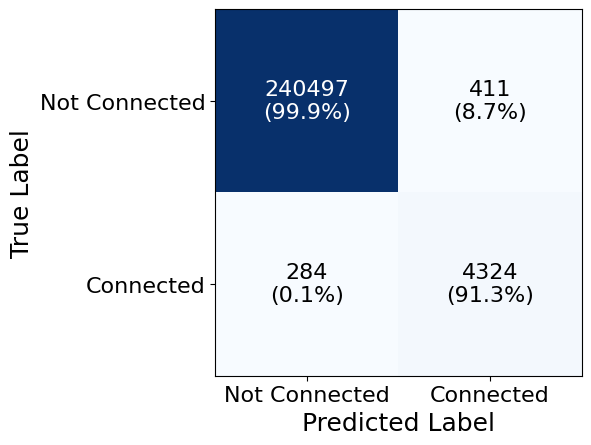

In [43]:
import sklearn
import matplotlib.pyplot as plt

con_mat = sklearn.metrics.confusion_matrix(flattened_label,flattened_pred)
#con_mat = sklearn.metrics.confusion_matrix(flattened_pred,flattened_label)
fig, ax = plt.subplots(figsize=(6, 6))
disp = sklearn.metrics.ConfusionMatrixDisplay(con_mat,display_labels=["Not Connected", "Connected"])
disp.plot(ax=ax, cmap='Blues', colorbar=False)
for text in ax.texts:  # Remove the default text annotations
    text.set_visible(False)

# Annotate the confusion matrix with both count and percentage
sums = np.sum(con_mat, axis=0)
for i in range(con_mat.shape[0]):
    for j in range(con_mat.shape[1]):
        count = con_mat[i, j]
        total = sums[j]
        percentage = 100 * count / total
        if count > (sums[0] + sums[1])*0.7: #Change color of text if background too dark
            textcolor = 'white'
        else:
            textcolor = 'black'
        ax.text(j, i, f'{count}\n({percentage:.1f}%)',
                ha='center', va='center', fontsize=16, color=textcolor)

# Increase font size of tick labels
plt.xticks(fontsize=16)  # Increase x-axis tick label size
plt.yticks(fontsize=16)  # Increase y-axis tick label size

# Increase font size of axis labels
ax.set_xlabel('Predicted Label', fontsize=18)  # Increase x-axis label size
ax.set_ylabel('True Label', fontsize=18)       # Increase y-axis label size
#ax.set_ylabel('Predicted Label', fontsize=18)  # Increase x-axis label size
#ax.set_xlabel('True Label', fontsize=18)       # Increase y-axis label size
plt.tight_layout()
plt.savefig("plots/confusion_matrix.png",dpi=100,bbox_inches="tight",transparent=True)

In [3]:
entry=12
data = reader[entry]

In [7]:
import math
import numpy as np
#Reset the MINERvA coordinates to align with 2x2
xmin = (-1080.0)
ymin = (-1450.0)
zmin = (-2400.0)
xmax = (1080.0) 
ymax = (1000.0) 
zmax = (3100.0)
offsetx, offsety, offsetz = 0.0, 218.33799743652344, 6913.0
xnum = int(math.ceil(abs((xmin - xmax)/3)))
ynum = int(math.ceil(abs((ymin - ymax)/3)))
znum = int(math.ceil(abs((zmin - zmax)/3)))

print(xnum,ynum,znum)

720 817 1834


[[6 7]
 [7 6]]


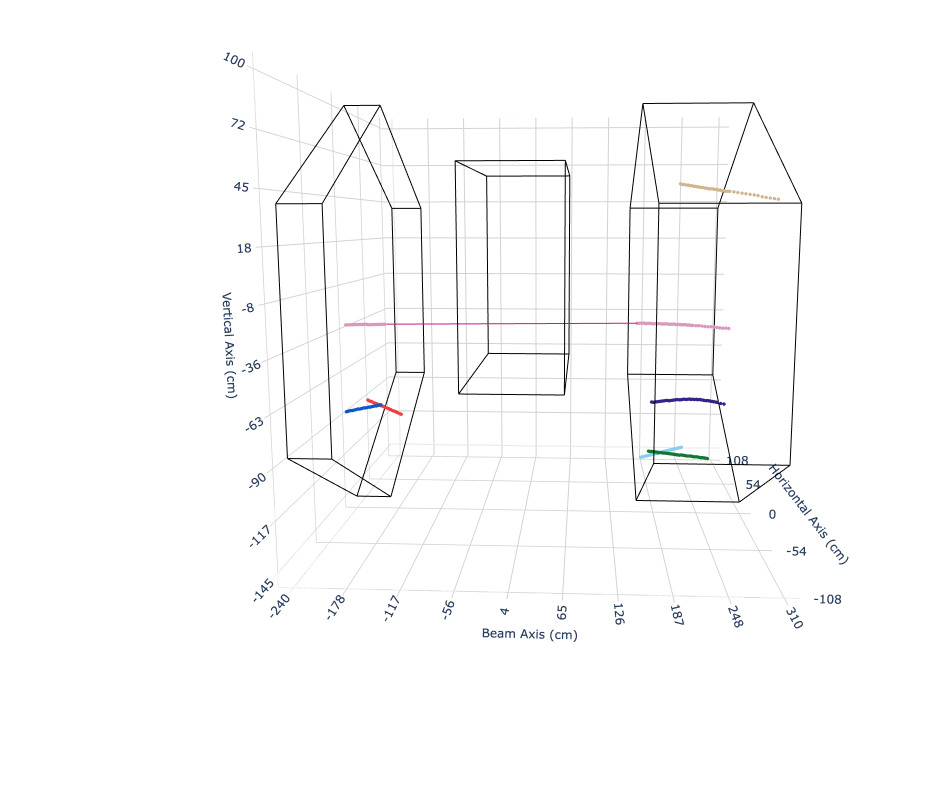

In [37]:
from spine.utils.globals import GROUP_COL
from spine.vis.network import network_topology
from spine.vis.layout import HIGH_CONTRAST_COLORS, layout3d

from plotly import graph_objs as go
from plotly.offline import iplot
import numpy as np

trace = []
CB_color_cycle = ['#332288','#117733', '#44AA99', '#88CCEE', 
                      '#EA4040','#0B57CB','#D79ABB','#7D7A7A','#D0B58F']
#CC6677',
mask = data['edge_pred'][:,1] > data['edge_pred'][:,0]
edge_index = data['edge_index'][mask]
print(edge_index)

trace+= network_topology(data['data'], data['clusts'], edge_index,clust_labels=data['group_pred'],
                       edge_labels=data['edge_pred'],
                       markersize=2, colorscale=CB_color_cycle,
                       name='')


fig = go.Figure(data=trace,layout=layout3d())
# Define the original ticks and their corresponding new values
original_xticks = np.linspace(0,xnum,5)
new_xticks = np.linspace(xmin,xmax,5)/10 #make mm to cm
original_yticks = np.linspace(0,ynum,10)
new_yticks = np.linspace(ymin,ymax,10)/10 #make mm to cm
original_zticks = np.linspace(0,znum,10)
new_zticks = np.linspace(zmin,zmax,10)/10 #make mm to cm

fig.update_layout(
    scene=dict(
        xaxis=dict(
            tickvals=original_xticks,  # Positions of the original ticks
            ticktext=[int(val) for val in new_xticks],  # New labels for each tick
            title=dict(
                text="Horizontal Axis (cm)",
                font=dict(
                    size=12)  # Adjust this value to move the label further away
            ),
            tickfont=dict(size=12), 
        ),
        yaxis=dict(
            tickvals=original_yticks,  # Positions of the original ticks
            ticktext=[int(val) for val in new_yticks],  # New labels for each tick
            title=dict(
                text="Vertical Axis (cm)",
                font=dict(
                    size=12)  # Adjust this value to move the label further away
            ),
            tickfont=dict(size=12),
        ),
        zaxis=dict(
            tickvals=original_zticks,  # Positions of the original ticks
            ticktext=[int(val) for val in new_zticks],  # New labels for each tick
            title=dict(
                text="Beam Axis (cm)",
                font=dict(
                    size=12)  # Adjust this value to move the label further away
            ),
            tickfont=dict(size=12),
        )
    ),
    margin=dict(l=200, r=50, b=100, t=0),
    scene_camera=dict(
        eye=dict(x=-2, y=0.2, z=0.087),  # Adjust eye position
        up=dict(x=-0, y=20, z=0)  # Set the 'y' axis as the vertical axis
    )
)

x_2x2min=-639.31
x_2x2max=639.31
y_2x2min=-620.76
y_2x2max=620.76
z_2x2min=-645.38
z_2x2max=645.38

add_3d_box(fig,x_min=find_num_index(x_2x2min,xmin,xmax,xnum),x_max=find_num_index(x_2x2max,xmin,xmax,xnum),
           y_min=find_num_index(y_2x2min,ymin,ymax,ynum),y_max=find_num_index(y_2x2max,ymin,ymax,ynum),
           z_min=find_num_index(z_2x2min,zmin,zmax,znum),z_max=find_num_index(z_2x2max,zmin,zmax,znum))
draw_minerva(fig)
fig.update_layout(showlegend=False)
iplot(fig)

In [12]:
def find_num_index(value, min_val, max_val, num):
    """
    Find the index in the num space given a value in the min/max space.
    
    Parameters:
    - value: The value in the min/max space.
    - min_val: The minimum value of the min/max space.
    - max_val: The maximum value of the min/max space.
    - num: The number of intervals or steps in the num space.
    
    Returns:
    - The corresponding index in the num space.
    """
    if value < min_val or value > max_val:
        raise ValueError("Value is out of bounds for the given min and max values.")
    
    num_index = int(((value - min_val) / (max_val - min_val)) * (num - 1))
    return num_index

In [9]:
def find_num_indices(values, min_val, max_val, num):
    """
    Find the indices in the num space for a list of values in the min/max space.
    
    Parameters:
    - values: A list of values in the min/max space.
    - min_val: The minimum value of the min/max space.
    - max_val: The maximum value of the min/max space.
    - num: The number of intervals or steps in the num space.
    
    Returns:
    - A list of indices in the num space.
    """
    if any(value < min_val or value > max_val for value in values):
        raise ValueError("Some values are out of bounds for the given min and max values.")
    
    num_indices = [
        int(((value - min_val) / (max_val - min_val)) * (num - 1))
        for value in values
    ]
    return num_indices

In [10]:
import plotly.graph_objects as go
import numpy as np

def add_3d_box(fig, x_min=-639.31, x_max=639.31, y_min=-620.76, y_max=620.76, z_min=-645.38, z_max=645.38):
    # Define the vertices of the box
    r = np.array([
        [x_min, y_min, z_min],
        [x_max, y_min, z_min],
        [x_max, y_max, z_min],
        [x_min, y_max, z_min],
        [x_min, y_min, z_max],
        [x_max, y_min, z_max],
        [x_max, y_max, z_max],
        [x_min, y_max, z_max]
    ])

    # Define the edges of the box
    edges = [
        [r[0], r[1], r[2], r[3], r[0]],  # Bottom face
        [r[4], r[5], r[6], r[7], r[4]],  # Top face
        [r[0], r[4]],  # Vertical edges
        [r[1], r[5]],
        [r[2], r[6]],
        [r[3], r[7]]
    ]

    # Create lines for the box
    for edge in edges:
        x_vals, y_vals, z_vals = zip(*edge)
        fig.add_trace(go.Scatter3d(
            x=x_vals, y=y_vals, z=z_vals,
            mode='lines',
            line=dict(color='black', width=2),
        ))

In [11]:
def draw_minerva(fig,x_min =-1080.0, y_min = -1450.0, z_min = -2400.0,
                x_max = 1080.0, y_max = 1000.0, z_max = 3100.0,
                x_num=720 , y_num=817, z_num=1834):
    x_base = [0, 1080, 1080, 0, -1080, -1080]
    x_base = find_num_indices(x_base, x_min, x_max, x_num)
    shift = 2450
    y_base = [-3900 + shift, -3300 + shift, -2040 + shift, -1450 + shift, -2060 + shift, -3300 + shift]
    y_base = find_num_indices(y_base, y_min, y_max, y_num)
    
    z_base = {
        "ds": [1640, 3100],
        "us": [-2400, -1900]
    }
    z_base["ds"] = find_num_indices(z_base["ds"], z_min, z_max, z_num)
    z_base["us"] = find_num_indices(z_base["us"], z_min, z_max, z_num)


    # Plot the cylindrical hexagon
    for j in ["ds", "us"]:
        for i in range(len(x_base)):
            # Bottom face
            fig.add_trace(go.Scatter3d(
                x=[x_base[i], x_base[(i + 1) % len(x_base)]],
                y=[y_base[i], y_base[(i + 1) % len(x_base)]],
                z=[z_base[j][0], z_base[j][0]],
                mode='lines',
                line=dict(color='black'),
            ))

            # Top face
            fig.add_trace(go.Scatter3d(
                x=[x_base[i], x_base[(i + 1) % len(x_base)]],
                y=[y_base[i], y_base[(i + 1) % len(x_base)]],
                z=[z_base[j][1], z_base[j][1]],
                mode='lines',
                line=dict(color='black'),
            ))

            # Vertical edges
            fig.add_trace(go.Scatter3d(
                x=[x_base[i], x_base[i]],
                y=[y_base[i], y_base[i]],
                z=[z_base[j][0], z_base[j][1]],
                mode='lines',
                line=dict(color='black'),
            ))

        

In [35]:
help(layout3d)

Help on function layout3d in module spine.vis.layout:

layout3d(ranges=None, meta=None, detector=None, titles=None, detector_coords=False, backgroundcolor='white', gridcolor='lightgray', width=800, height=800, showlegend=True, camera=None, aspectmode='manual', aspectratio=None, dark=False, margin=None, hoverlabel=None, **kwargs)
    Produces plotly.graph_objs.Layout object for a certain format.
    
    Parameters
    ----------
    ranges : np.ndarray, optional
        (3, 2) or (N, 3) Array used to specify the plot region in (x,y,z)
        directions. If not specified (None), the range will be set to include
        all points. Alternatively can be an array of shape (3,2) specifying
        (x,y,z) axis (min,max) range for a display, or simply a list of points
        with shape (N,3+) where [:,0],[:,1],[:,2] correspond to (x,y,z) values
        and the plotting region is decided by measuring the min,max range in
        each coordinates. This last option is useful if one wants to d

In [12]:


#### HAS ENTRY!!!!!! #######
from spine.utils.globals import GROUP_COL
from spine.vis.network import network_topology
from spine.vis.layout import HIGH_CONTRAST_COLORS, layout3d

from plotly import graph_objs as go
from plotly.offline import iplot

entry=3
trace = []

edge_index = data['edge_index'][entry][data['edge_pred'][entry][:,1] > data['edge_pred'][entry][:,0]]
edge_index = []
print(edge_index)

trace+= network_topology(data['data'][entry], data['clusts'][entry], edge_index, clust_labels=data['group_pred'][entry],
                       edge_labels=data['edge_pred'][entry],
                       markersize=2, cmin=0, cmax=50, colorscale=HIGH_CONTRAST_COLORS,
                       name='')

fig = go.Figure(data=trace,layout=layout3d(meta=data['meta'][entry]))
# Define the original ticks and their corresponding new values
original_ticks = [0, 400, 800, 1200, 1600]
new_ticks = [0, 4, 8, 12, 16]  # New tick values

# Change the x-ticks and labels
fig.update_xaxes(
    tickvals=original_ticks,  # Positions of the original ticks
    ticktext=[str(val) for val in new_ticks]  # New labels for each tick
)
iplot(fig)

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
network_topology

***
***
## VI. Exercises

Here's a few suggestions of things to try out to familirize yourself with the process:
- Train uresnet using the provided configuration file. Modify the file to use the `mpvmpr_mini.root` dataset to speed up the process. Check the number of entries in the file and adapt the number of iterations accordingly! Skip the last 30 entries with the `skip_event_list` parameter to keep them for validation
- Run the validation using the last 30 entries in the file using the `entry_list` parameter
- Try the same process to train grappa_shower (`grappa_shower.cfg` provided) with the `generic_small.root` dataset
- Modify `grappa_shower.cfg` to `grappa_shower_val.cfg` to use for validation
- Visualize all of the above as you go!
- Try this out with your favortite detector! (ICARUS, SBND, 2x2...)